In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint
from wordcloud import WordCloud
from IPython.display import display

## **A - Corpus Statistics (25 Poin)**

### **1. [1] Berapakah jumlah data yang terdapat pada “Korpus.json”?**

In [2]:
korpus_df = pd.read_json('Dataset Tugas 1/Korpus.json')

print(korpus_df.shape)
display(korpus_df)

(1051, 10)


,section,articleid,articletype,createdate,author,originalTitle,tag,keywords,subsection,content
0,ekonomi,548551,singlepage,2020-09-20 12:18:07,BPH Migas,BPH Migas-Pertamina Akan Bangun SPBN di Krui,bph migas|krui,"bph migas, krui",Ragam Energi,Kepala BPH Migas M. Fashurullah Asa mengadakan...
1,nasional,548550,singlepage,2020-09-20 12:17:24,CNN Indonesia,GNPF Ulama Sumut Galang Petisi Tunda Pilkada 2020,pilkada medan|pilkada medan 2020|gnpf ulama|sumut,"pilkada medan, pilkada medan 2020, gnpf ulama,...",Berita Peristiwa,Gerakan Nasional Pengawal Fatwa (GNPF) Ulama S...
2,internasional,548512,singlepage,2020-09-20 09:45:28,author,AS Tunda Larangan TikTok Hingga 27 September,amerika serikat|tiktok|larangan tiktok,"amerika serikat, tiktok, larangan tiktok",Berita Eropa Amerika,Kementerian Perdagangan Amerika Serikat mengum...
3,teknologi,548509,singlepage,2020-09-20 08:52:22,author,Penyebab Transmisi Matic Mobil Lemot,konsultasi otomotif|cara menggunakan transmisi...,"konsultasi otomotif, cara menggunakan transmis...",Ragam Otomotif,Pertanyaan: Apa penyebab transmisi matic mobil...
4,hiburan,548507,singlepage,2020-09-20 08:09:35,author,Felicity Jones Kenang Sosok Hakim Agung AS Rut...,felicity jones|ruth bader ginsburg|ruth bader ...,"felicity jones, ruth bader ginsburg, ruth bade...",Berita Seleb,Aktris Felicity Jones turut mengenang sosok Ha...
...,...,...,...,...,...,...,...,...,...,...
1046,hiburan,539470,singlepage,2020/08/26 12:59:34,Tim,Thunderstruck dan Film tentang Basket untuk Pe...,artikel timeless|rekomendasi film|film tentang...,"artikel timeless, rekomendasi film, film tenta...",Ragam Film,Film yang mengangkat tema olahraga tak begitu ...
1047,hiburan,538532,singlepage,2020/08/24 09:49:53,Tim,Film Detektif Korea yang Seru dan Penuh Teka-teki,artikel timeless|rekomendasi film|film korea|f...,"artikel timeless, rekomendasi film, film korea...",Ragam Film,Film Koreamemiliki beragam tema unggulan selai...
1048,hiburan,532456,singlepage,2020/08/05 14:16:13,Tim,"6 Film Horor Barat Terseram, Bikin Bulu Kuduk ...",artikel timeless|film horor|film horor barat|f...,"artikel timeless, film horor, film horor barat...",Ragam Film,Tidak bisa dimungkiri Hollywood mampu memprodu...
1049,hiburan,528516,singlepage,2020/07/24 13:01:53,Tim,Hospital Playlist dan Drama Korea yang Dibinta...,artikel timeless|drama korea|rekomendasi drama...,"artikel timeless, drama korea, rekomendasi dra...",Ragam Film,Jo Jung-suk memulai kariernya di dunia hiburan...


Terdapat **1050** data pada dokumen `Korpus.json`

### **2. [6] Pada soal ini, lakukan analisa untuk fitur “section” pada korpus dengan menjawab pertanyaan-pertanyaan berikut ini!**

a. [2] Hitunglah berapa banyak jumlah “section” yang **unik**. Sebutkan “section” apa saja yang terdapat dalam korpus tersebut!

In [3]:
section_arr = korpus_df['section']
section_arr_unique = section_arr.unique()

print(f'Terdapat {section_arr_unique.size} section yang unik')
print('Section-section tersebut yakni: ')
print(section_arr_unique)

Terdapat 6 section yang unik
Section-section tersebut yakni: 
['ekonomi' 'nasional' 'internasional' 'teknologi' 'hiburan' 'olahraga']


b. [4] Tampilkan jumlah data untuk setiap “section” dalam bentuk **histogram**!

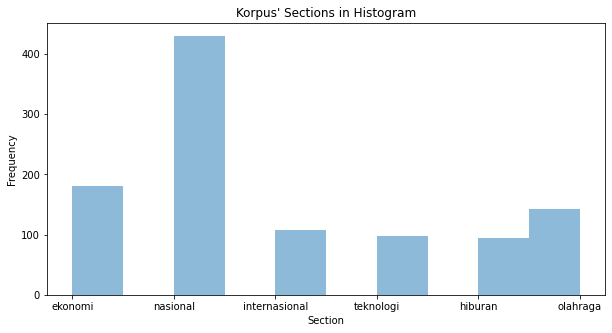

In [4]:
plt.figure(figsize=(10,5))
plt.title("Korpus' Sections in Histogram", fontsize=12)
plt.hist(section_arr, alpha=0.5)
plt.ylabel("Frequency")
plt.xlabel("Section")
plt.show()

### **3. [12] Pada soal ini, lakukan analisa untuk fitur “content” pada korpus dengan menjawab pertanyaan-pertanyaan berikut ini! Untuk mempermudah pengerjaan, suatu token dalam korpus dapat dianggap sebagai kata jika seluruh karakter berupa alphanumeric (A-z, 0-9).**

a. [3] Hitunglah jumlah kata yang unik dalam korpus. Catatan: Kata “Jakarta” dan “jakarta” dianggap sebagai kata yang sama.

In [5]:
content_arr = korpus_df['content']

unique_words = set()

cleaned_content = content_arr.str.lower()
cleaned_content = cleaned_content.str.replace('[^\w\s]', ' ', regex=True)
cleaned_content = cleaned_content.str.split(expand=True)

cleaned_content.apply(unique_words.update)

print(f'Terdapat {len(unique_words)} kata yang unik di dalam korpus')

Terdapat 21913 kata yang unik di dalam korpus


b. [5] Tampilkan 100 kata diurutkan berdasarkan jumlah kemunculan terbanyak dalam bentuk **histogram**! Kemudian, sebutkan 10 kata terbanyak dalam korpus beserta jumlahnya!

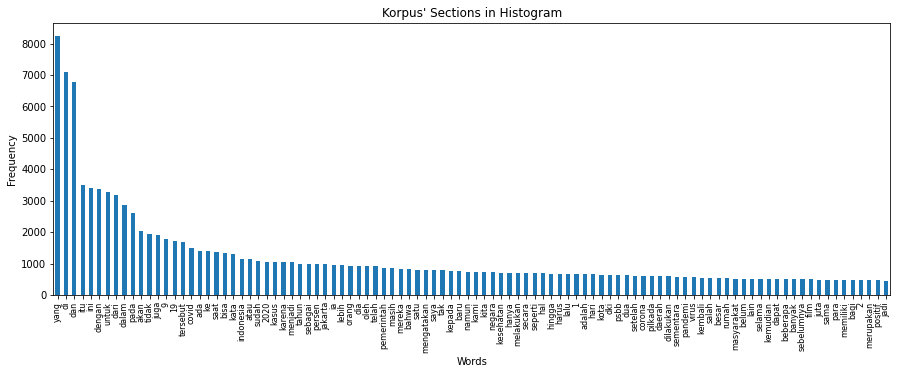

10 kata terbanyak dalam korpus beserta jumlahnya:
yang      8241
di        7086
dan       6781
itu       3493
ini       3393
dengan    3372
untuk     3274
dari      3173
dalam     2866
pada      2616
dtype: int64


In [6]:
cleaned_content_stack = cleaned_content.stack()
cleaned_content_with_freq = cleaned_content_stack.value_counts()

plt.figure(figsize=(15,5))
plt.title("Korpus' Sections in Histogram", fontsize=12)
cleaned_content_with_freq[0:100].plot(kind='bar')
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

print('10 kata terbanyak dalam korpus beserta jumlahnya:')
pprint(cleaned_content_with_freq[0:10])

c. [4] Sebutkan 10 kata **bigram** terbanyak dalam korpus!

In [7]:
cleaned_content = content_arr.str.lower()
cleaned_content = cleaned_content.str.replace('[^\w\s]', ' ', regex=True)
cleaned_content = cleaned_content.str.split()

bigrams = cleaned_content.apply(
    lambda row: list(nltk.ngrams(row, 2))
)
bigrams = bigrams.explode()
bigrams = bigrams.dropna()
bigrams = bigrams.value_counts()

print('10 kata bigram terbanyak dalam korpus adalah:')
print(bigrams[0:10])

10 kata bigram terbanyak dalam korpus adalah:
(covid, 19)              1400
(saat, ini)               556
(dki, jakarta)            447
(virus, corona)           436
(salah, satu)             320
(cnnindonesia, com)       300
(selain, itu)             258
(rumah, sakit)            252
(di, indonesia)           249
(protokol, kesehatan)     245
Name: content, dtype: int64


### 4. [6] Pada soal ini, lakukan analisa untuk fitur “originalTitle” pada korpus dengan menjawab pertanyaan-pertanyaan berikut ini! Identik dengan soal sebelumnya, suatu token dalam korpus dapat dianggap sebagai kata jika seluruh karakter berupa alphanumeric (A-z, 0-9).

a. [2] Berapa rata-rata jumlah kata yang terdapat dalam “originalTitle”?

In [8]:
og_title_arr = korpus_df['originalTitle']

cleaned_title = og_title_arr.str.lower()
cleaned_title = cleaned_title.str.replace('[^\w\s]', ' ', regex=True)
cleaned_title = cleaned_title.str.split()

cleaned_title_word_count = cleaned_title.str.len()
mean = cleaned_title_word_count.mean()

print(f'Rata-rata jumlah kata yang terdapat dalam originalTitle adalah {mean}')

Rata-rata jumlah kata yang terdapat dalam originalTitle adalah 8.533777354900096


b. [4] Tampilkan word cloud untuk fitur “originalTitle” dalam korpus!

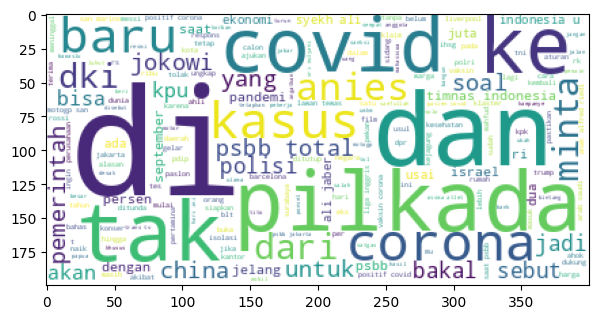

In [22]:
cleaned_title = og_title_arr.str.lower()
cleaned_title = cleaned_title.str.replace('[^\w\s]', ' ', regex=True)
cleaned_title = cleaned_title.str.split(expand=True)
cleaned_title = cleaned_title.stack()

cleaned_title = " ".join(list(cleaned_title))

wordcloud = WordCloud(background_color='white').generate(cleaned_title)
plt.figure(figsize=(7, 5), dpi=100, facecolor='w', edgecolor='w')
plt.imshow(wordcloud)